In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
import numpy as np

In [5]:
# Now we're going to try importing OpenCV, the traditional standard Computer Vision library, and using its face detector
import cv2
from skimage import io
print('Imported OpenCV correctly')

Imported OpenCV correctly


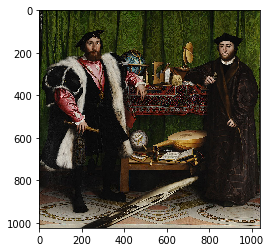

In [6]:
Ambassadors = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Hans_Holbein_the_Younger_-_The_Ambassadors_-_Google_Art_Project.jpg/1039px-Hans_Holbein_the_Younger_-_The_Ambassadors_-_Google_Art_Project.jpg')
plt.imshow(Ambassadors)

In [8]:
import urllib.request
from pathlib import Path

my_file = Path("../haarcascade_frontalface_default.xml")
if not my_file.is_file():
    print('File not found - downloading....')
    urllib.request.urlretrieve ("https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml", "./haarcascade_frontalface_default.xml")
else:
    print('Face detector file found correctly')

Face detector file found correctly


In [9]:
# Now we load the pretrained face detector into memory, and convert the image into greyscale:

faceCascade = cv2.CascadeClassifier('../haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(Ambassadors, cv2.COLOR_BGR2GRAY)

In [10]:
# And detect the faces from the greyscale image, saving the coordinates into the list 'facecoods'

faceCoords = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)

In [ ]:
# We use the coordinates to crop sections of our original (colour) image:

faceim = []
for f in faceCoords:
    faceim.append(Ambassadors[ f[1]:f[1]+f[3],f[0]:f[0]+f[2],:])
    
    

In [24]:
from skimage import color

In [63]:
def findFaceImages(input_image):
    if len(np.shape(input_image)) > 2:
        gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    else:
        gray = input_image
        input_image = cv2.cvtColor(input_image, cv2.COLOR_GRAY2BGR)
    
    faceCoords = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )
    faceim = []
    for f in faceCoords:
        faceim.append(input_image[ f[1]:f[1]+f[3],f[0]:f[0]+f[2],:])

    return faceim

In [64]:
faceim = findFaceImages(Ambassadors)

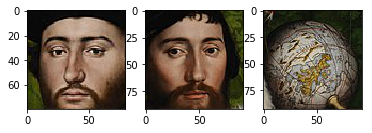

In [65]:
# Finally, we display our cropped faces in the notebook:

nFaces = len(faceim)
for i in range(nFaces):
    plt.subplot(1,nFaces,1+i)
    plt.imshow(faceim[i])
    

In [66]:
import glob

In [67]:
DietrichFiles = glob.glob('../ImageData/Dietrich/*.jp*g')

In [68]:
len(DietrichFiles)

123

In [69]:
import tqdm

In [77]:
allfaceims = []
for d in tqdm.tqdm(DietrichFiles):
    allfaceims.extend(findFaceImages(io.imread(d)))
    

100%|██████████| 123/123 [00:20<00:00,  5.89it/s]


In [83]:
len(allfaceims)

173

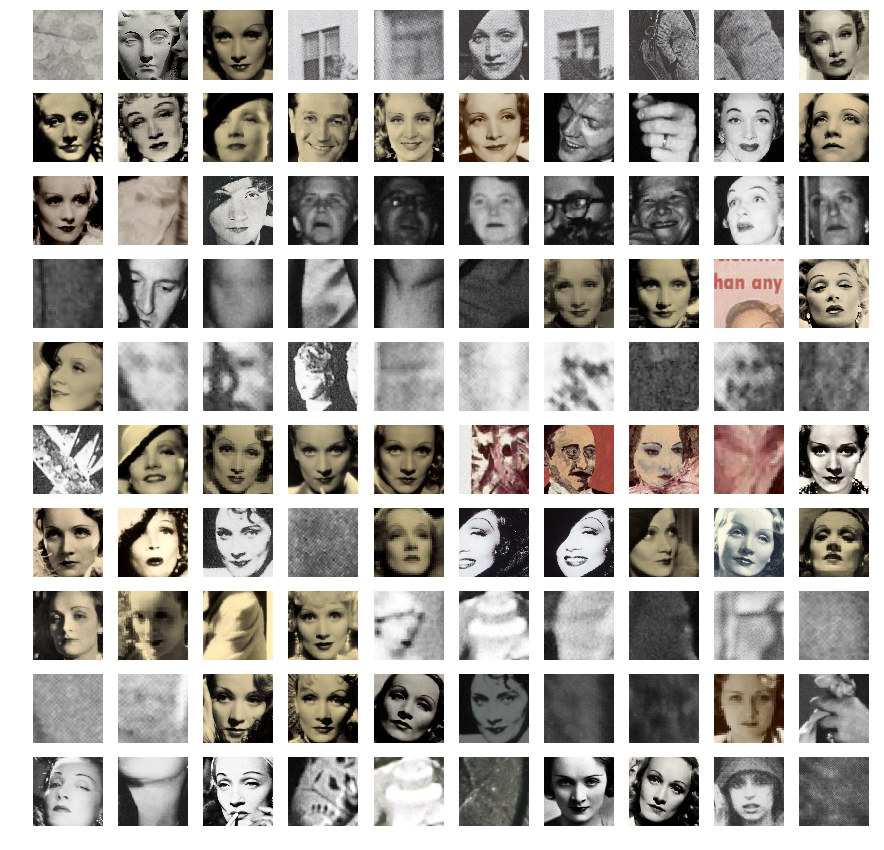

In [85]:
plt.figure(figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(allfaceims[i])
    plt.axis('off')